In [26]:
import pandas as pd
from typing import Optional
from pathlib import Path

def load_csv_data(file_path: str) -> pd.DataFrame:
    """Load a CSV file into a pandas DataFrame.
    
    Args:
        file_path (str): Path or URL to the CSV file.
    
    Returns:
        pd.DataFrame: Loaded DataFrame.
    
    Raises:
        FileNotFoundError: If the file path is invalid.
        pd.errors.EmptyDataError: If the CSV is empty.
    """
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find CSV file at {file_path}")
    except pd.errors.EmptyDataError:
        raise pd.errors.EmptyDataError("The CSV file is empty")

def calculate_column_average(df: pd.DataFrame, column: str) -> float:
    """Calculate the average of a specified column in a DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to compute the average for.
    
    Returns:
        float: Average value of the column.
    
    Raises:
        KeyError: If the column name is not found in the DataFrame.
        ValueError: If the column is empty or contains non-numeric data.
    """
    if column not in df.columns:
        raise KeyError(f"Column '{column}' not found in DataFrame")
    if df[column].empty:
        raise ValueError(f"Column '{column}' is empty")
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"Column '{column}' contains non-numeric data")
    return df[column].mean()

def find_column_max(df: pd.DataFrame, column: str) -> float:
    """Find the maximum value in a specified column.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to find the maximum for.
    
    Returns:
        float: Maximum value in the column.
    
    Raises:
        KeyError: If the column name is not found in the DataFrame.
        ValueError: If the column is empty.
    """
    if column not in df.columns:
        raise KeyError(f"Column '{column}' not found in DataFrame")
    if df[column].empty:
        raise ValueError(f"Column '{column}' is empty")
    return df[column].max()

def filter_by_category(df: pd.DataFrame, column: str, value: str) -> pd.DataFrame:
    """Filter DataFrame rows based on a categorical value in a column.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to filter on.
        value (str): Value to filter by.
    
    Returns:
        pd.DataFrame: Filtered DataFrame.
    
    Raises:
        KeyError: If the column name is not found in the DataFrame.
        ValueError: If no rows match the filter criteria.
    """
    if column not in df.columns:
        raise KeyError(f"Column '{column}' not found in DataFrame")
    filtered_df = df[df[column] == value]
    if filtered_df.empty:
        raise ValueError(f"No rows found where '{column}' equals '{value}'")
    return filtered_df

if __name__ == "__main__":
    # Example workflow (reusable for other datasets)
    try:
        # Load the Iris dataset
        iris_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
        df = load_csv_data(iris_url)
        
        # Calculate and print average sepal length
        avg_sepal = calculate_column_average(df, "sepal_length")
        print(f"Average sepal length: {avg_sepal}")
        
        # Find and print max petal width
        max_petal = find_column_max(df, "petal_width")
        print(f"Max petal width: {max_petal}")
        
        # Filter and display rows where species is 'setosa'
        setosa_df = filter_by_category(df, "species", "setosa")
        print("\nFirst 5 rows where species is 'setosa':")
        print(setosa_df.head())
        
    except (FileNotFoundError, pd.errors.EmptyDataError, KeyError, ValueError) as e:
        print(f"Error: {e}")


Average sepal length: 5.843333333333334
Max petal width: 2.5

First 5 rows where species is 'setosa':
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


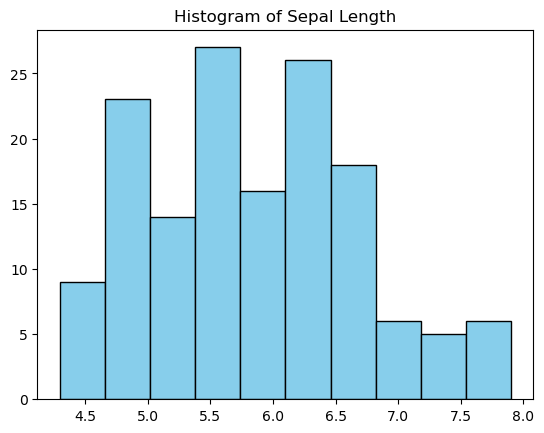

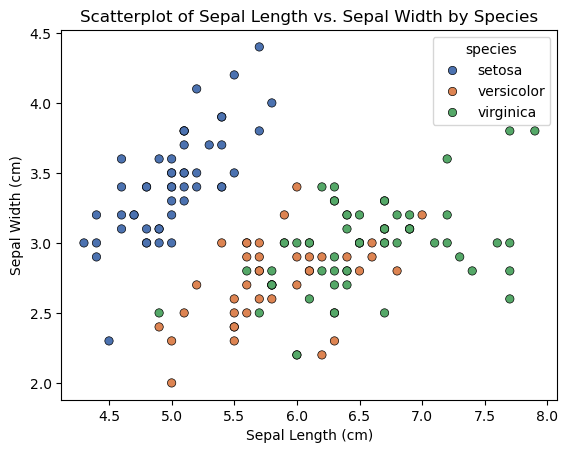

In [28]:
# Visualisation using matplotlib and Seaborn

import matplotlib.pyplot as plt
plt.hist(df['sepal_length'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.show()


import seaborn as sns
# df is the Iris DataFrame
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='deep', edgecolor='black')
print()
plt.title('Scatterplot of Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()